In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


from keras.layers import Dense, LSTM, Flatten

print(tf.__version__)

2.3.0


In [205]:
# Semilla de aleatoriedad del experimento.
tf.random.set_seed(7)

In [206]:
# Carga del dataset.
dataframe = pd.read_csv('sueldo_bruto_medio_2006.csv', sep=";", usecols=[1], engine='python')
dataset = dataframe.values
values = dataset.astype('float32')

In [207]:
PASOS=4

# ajuste de la serie para formato de LSTM
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [208]:
# formato LSTM
reframed = series_to_supervised(values, PASOS, 1)
reframed.head()

,var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
4,1572.589966,1643.459961,1774.339966,1815.180054,1838.819946
5,1643.459961,1774.339966,1815.180054,1838.819946,1841.750000
6,1774.339966,1815.180054,1838.819946,1841.750000,1850.260010
7,1815.180054,1838.819946,1841.750000,1850.260010,1869.109985
8,1838.819946,1841.750000,1850.260010,1869.109985,1881.319946


In [209]:
# separación en datos de test y entrenamiento del modelo
values = reframed.values
n_train_days = 18 - (7+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# separación en entradas y salidas
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reformulación 3D vectores para LSTM
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(7, 1, 4) (7,) (4, 1, 4) (4,)


In [210]:
# Definición del modelo

def crear_modeloFF():
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(1, PASOS)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.summary()
    return model

In [211]:
# Definición del número de epochs de entrenamiento del modelo.

EPOCHS=200
 
model = crear_modeloFF()

#Entrenamiento del modelo

history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 50)                11000     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 11,051
Trainable params: 11,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
2/2 [==============================] - 0s 83ms/step - loss: 3921878.7500 - val_loss: 3938560.0000
Epoch 2/200
2/2 [==============================] - 0s 6ms/step - loss: 3580630.0000 - val_loss: 3845185.0000
Epoch 3/200
2/2 [==============================] - 0s 7ms/step - loss: 3450969.7500 - val_loss: 3753663.5000
Epoch 4/200
2/2 [==============================] - 0s 8ms/step - loss: 3368056.2500 - val_loss: 3663883.5000
Epoch 5/200
2/2 [==============================] - 0s 8ms/step - loss: 328

2/2 [==============================] - 0s 10ms/step - loss: 451323.2812 - val_loss: 493616.5938
Epoch 71/200
2/2 [==============================] - 0s 9ms/step - loss: 427514.4688 - val_loss: 467711.5000
Epoch 72/200
2/2 [==============================] - 0s 6ms/step - loss: 404436.4688 - val_loss: 442690.9688
Epoch 73/200
2/2 [==============================] - 0s 7ms/step - loss: 382233.5000 - val_loss: 418542.1250
Epoch 74/200
2/2 [==============================] - 0s 7ms/step - loss: 360870.6562 - val_loss: 395261.8125
Epoch 75/200
2/2 [==============================] - 0s 7ms/step - loss: 340184.7188 - val_loss: 372867.9062
Epoch 76/200
2/2 [==============================] - 0s 8ms/step - loss: 320321.7500 - val_loss: 351343.8750
Epoch 77/200
2/2 [==============================] - 0s 7ms/step - loss: 301392.6562 - val_loss: 330664.7500
Epoch 78/200
2/2 [==============================] - 0s 7ms/step - loss: 283165.3125 - val_loss: 310846.3125
Epoch 79/200
2/2 [======================

2/2 [==============================] - 0s 7ms/step - loss: 1784.8450 - val_loss: 2003.8829
Epoch 148/200
2/2 [==============================] - 0s 6ms/step - loss: 1747.2462 - val_loss: 1962.8071
Epoch 149/200
2/2 [==============================] - 0s 7ms/step - loss: 1736.6914 - val_loss: 1922.9546
Epoch 150/200
2/2 [==============================] - 0s 6ms/step - loss: 1727.0475 - val_loss: 1885.6813
Epoch 151/200
2/2 [==============================] - 0s 6ms/step - loss: 1713.0085 - val_loss: 1852.8656
Epoch 152/200
2/2 [==============================] - 0s 7ms/step - loss: 1707.1160 - val_loss: 1821.7561
Epoch 153/200
2/2 [==============================] - 0s 7ms/step - loss: 1699.3494 - val_loss: 1793.8628
Epoch 154/200
2/2 [==============================] - 0s 7ms/step - loss: 1694.9969 - val_loss: 1768.4138
Epoch 155/200
2/2 [==============================] - 0s 7ms/step - loss: 1692.6708 - val_loss: 1745.5439
Epoch 156/200
2/2 [==============================] - 0s 6ms/step - lo

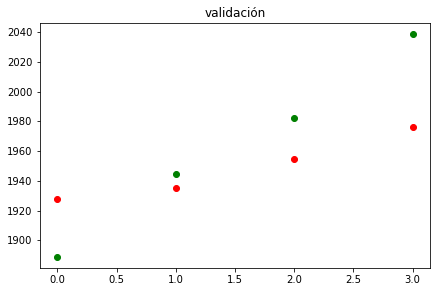

In [223]:
# Comparación de los resultados predichos por el modelo con los resultados reales de la serie.

results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validación')
plt.show()

In [213]:
# Carga de nuevo del dataset.
dataframe_2 = pd.read_csv('sueldo_bruto_medio_2006.csv', sep=";", usecols=[1], engine='python')
dataframe_2 = dataframe_2.values
values_2 = dataframe_2.astype('float32')

In [214]:
# Recogida de los ultimos valores.

values_2 = values_2[-15:]


In [215]:
PASOS = 4

reframed_2 = series_to_supervised(values_2, PASOS, 1)
reframed_2.drop(reframed_2.columns[[4]], axis=1, inplace=True) # Quita las columnas que queremos predecir (t).
reframed_2.tail(7)

,var1(t-4),var1(t-3),var1(t-2),var1(t-1)
8,1838.819946,1841.750000,1850.260010,1869.109985
9,1841.750000,1850.260010,1869.109985,1881.319946
10,1850.260010,1869.109985,1881.319946,1893.699951
11,1869.109985,1881.319946,1893.699951,1878.089966
12,1881.319946,1893.699951,1878.089966,1888.949951
13,1893.699951,1878.089966,1888.949951,1944.420044
14,1878.089966,1888.949951,1944.420044,1982.310059


In [216]:
values = reframed_2.values
x_test = values[10:, :] #Coge la ultima columna que es equivalente a la ultima fila
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[1878.09, 1888.95, 1944.42, 1982.31]]], dtype=float32)

In [217]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(41):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[1878.09 1888.95 1944.42 1982.31]]]
[[[1888.95   1944.42   1982.31   1976.1023]]]
[[[1944.42   1982.31   1976.1023 1998.175 ]]]
[[[1982.31   1976.1023 1998.175  2028.0646]]]
[[[1976.1023 1998.175  2028.0646 2049.7954]]]
[[[1998.175  2028.0646 2049.7954 2066.7532]]]
[[[2028.0646 2049.7954 2066.7532 2089.6714]]]
[[[2049.7954 2066.7532 2089.6714 2113.4998]]]
[[[2066.7532 2089.6714 2113.4998 2135.4487]]]
[[[2089.6714 2113.4998 2135.4487 2157.3215]]]
[[[2113.4998 2135.4487 2157.3215 2180.5378]]]
[[[2135.4487 2157.3215 2180.5378 2203.9207]]]
[[[2157.3215 2180.5378 2203.9207 2227.1196]]]
[[[2180.5378 2203.9207 2227.1196 2250.621 ]]]
[[[2203.9207 2227.1196 2250.621  2274.5657]]]
[[[2227.1196 2250.621  2274.5657 2298.706 ]]]
[[[2250.621  2274.5657 2298.706  2323.0269]]]
[[[2274.5657 2298.706  2323.0269 2347.6343]]]
[[[2298.706  2323.0269 2347.6343 2372.5312]]]
[[[2323.0269 2347.6343 2372.5312 2397.6726]]]
[[[2347.6343 2372.5312 2397.6726 2423.0684]]]
[[[2372.5312 2397.6726 2423.0684 2448.74  

In [218]:
index = pd.Index(range(14, 55, 1))


prediccion1 = pd.DataFrame(results, index)
prediccion1.columns = ['total']
prediccion1

,total
14,1976.102295
15,1998.175049
16,2028.064575
17,2049.795410
18,2066.753174
19,2089.671387
20,2113.499756
21,2135.448730
22,2157.321533
23,2180.537842


In [219]:
dataframe_3 = pd.read_csv('sueldo_bruto_medio_2006.csv', sep=";", usecols=[1], engine='python')
dataframe_3 = dataframe_3.values
values_3 = dataframe_3.astype('float32')
antiguo = pd.DataFrame(values_3)
antiguo.drop(index=antiguo.index[-1],axis=0,inplace=True)
antiguo.columns = ['total']


In [220]:
frames = [antiguo, prediccion1]

result = pd.concat(frames)

In [221]:
result

result.to_csv('pruebaSueldoMedio.csv', mode='a', index=False, header=False)

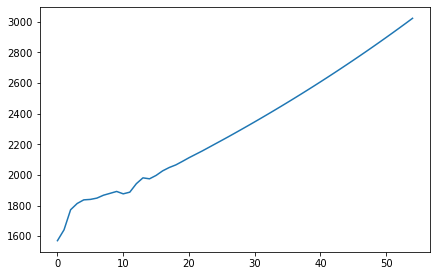

In [222]:
# Se representa conjuntamente los datos obtenidos tras la predicción junto con los datos reales de la serie.

plt.plot(result)
plt.show()